# Time Series Analysis Maternal Complications-ARIMA Model

Due to the Covid-19 times in Uganda since 2020, Maternal health is reasoned as a complex and often vexing issue.  It is one of the most proactive and difficult bioethical discussions to date, challenging the obligations of society, policymakers, and health care professionals to expectant mothers and their unborn children. The COVID-19 pandemic has had a significant impact on maternal health globally, with disruptions to healthcare systems and social distancing measures making it more difficult for pregnant women to access necessary care.  In Uganda, the situation is particularly dire, with already-limited resources stretched even thinner by the pandemic. In this study, the author uses predictive analytics to identify risk factors for maternal complications in the COVID-19 era in Uganda.

## Importing Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,7

import warnings
warnings.filterwarnings('ignore')

## Reading dataset

In [149]:
data = pd.read_csv('merged_data_month.csv')
data = data.loc[:, ['month', 'deaths']]
data = data.sort_values(by='month')
data.head(4)

,month,deaths
0,2021-01-01,64
2,2021-02-01,62
4,2021-03-01,79
6,2021-04-01,78


In [150]:
#parse strings to datetime type
data['month']=pd.to_datetime(data['month'], infer_datetime_format=True)

# set Date column as index
data = data.set_index('month')

In [151]:
# first five rows of dataframe
data.head()

,deaths
month,
2021-01-01,64
2021-02-01,62
2021-03-01,79
2021-04-01,78
2021-05-01,84


In [152]:
# last 5 rows of dataframe
data.tail()

,deaths
month,
2022-08-01,117
2022-09-01,83
2022-10-01,99
2022-11-01,87
2022-12-01,101


## Exploratory Data Analysis

In [153]:
# column names
data.columns

Index(['deaths'], dtype='object')

In [154]:
# shape of the dataframe
data.shape

(24, 1)

In [155]:
# concise summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   deaths  24 non-null     int64
dtypes: int64(1)
memory usage: 384.0 bytes


In [156]:
# checking for null values
data.isnull().sum()

deaths    0
dtype: int64

In [157]:
# descriptive statistics of data
data.describe()

,deaths
count,24.000000
mean,84.625000
std,13.544813
min,62.000000
25%,77.000000
50%,83.500000
75%,89.500000
max,117.000000


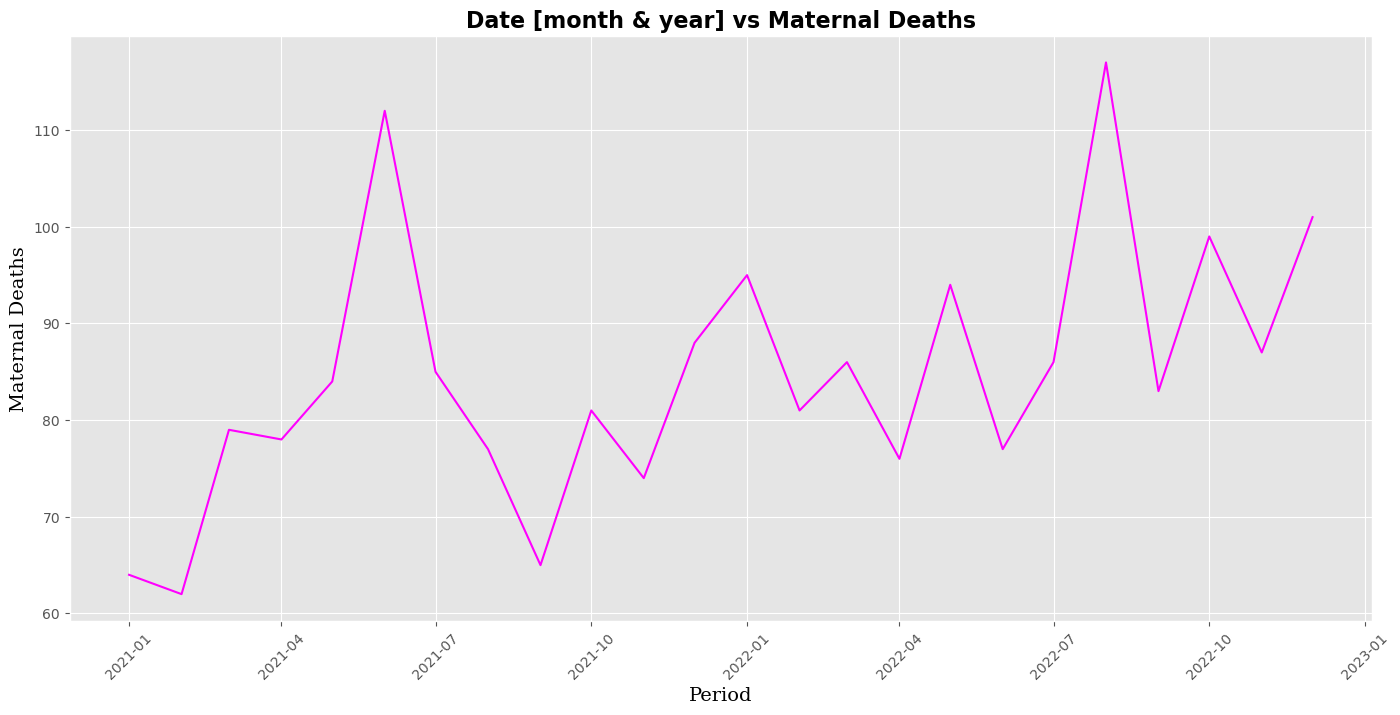

In [158]:
# plot graph
plt.style.use('ggplot')
plt.ylabel('Maternal Deaths', fontsize=14, fontfamily='serif')
plt.xlabel('Period', fontsize=14, fontfamily='serif')
plt.xticks(rotation=45)
plt.title('Date [month & year] vs Maternal Deaths',fontsize=16, fontweight='bold', fontfamily='sans-serif')
plt.annotate('Annotate', xy=(3, 9), xytext=(4, 16), fontsize=12,
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.tight_layout()
plt.plot(data, color='magenta')

In [159]:
# split data into training and testing sets
train_data = data.iloc[:len(data)-6]
test_data = data.iloc[len(data)-6:]

In [160]:
test_data

,deaths
month,
2022-07-01,86
2022-08-01,117
2022-09-01,83
2022-10-01,99
2022-11-01,87
2022-12-01,101


## Determining Rolling Statistics

In [161]:
# rolling mean
rolmean = train_data.rolling(window=3).mean()
rolmean.head()

,deaths
month,
2021-01-01,NaN
2021-02-01,NaN
2021-03-01,68.333333
2021-04-01,73.000000
2021-05-01,80.333333


In [162]:
# rolling standard deviation
rolstd = train_data.rolling(window=3).std()
rolstd.head()

,deaths
month,
2021-01-01,NaN
2021-02-01,NaN
2021-03-01,9.291573
2021-04-01,9.539392
2021-05-01,3.214550


## Dickey-Fuller Test

In [163]:
# perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

In [164]:
# Wrapping visual and statistical tools in a single function

def test_stationarity(timeseries):
    
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()
    
    # Plot rolling statistics
    org = plt.plot(timeseries, color='b', label='Original')
    mean = plt.plot(rolmean, color='r', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.style.use('ggplot')
    plt.legend(loc='best')
    plt.ylabel('Maternal Deaths', fontsize=14, fontfamily='serif')
    plt.xlabel('Period', fontsize=14, fontfamily='serif')
    plt.xticks(rotation=45)
    plt.title('Rolling Mean & Standard Deviation',fontsize=16, fontweight='bold', fontfamily='sans-serif')
    plt.annotate('Annotate', xy=(3, 9), xytext=(4, 16), fontsize=12,
             arrowprops=dict(facecolor='black', arrowstyle='->'))
    plt.tight_layout()
    plt.show(block=False)
    
    # perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries.deaths, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p value','#Lags used', 'No:of observations found'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value    
    print(dfoutput)

Also, a given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

Level: The average value in the series.

Trend: The increasing or decreasing value in the series.

Seasonality: The repeating short-term cycle in the series.

Noise: The random variation in the series.

First, we need to check if a series is stationary or not because time series analysis only works with stationary data.

ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

**So let's check for stationarity:

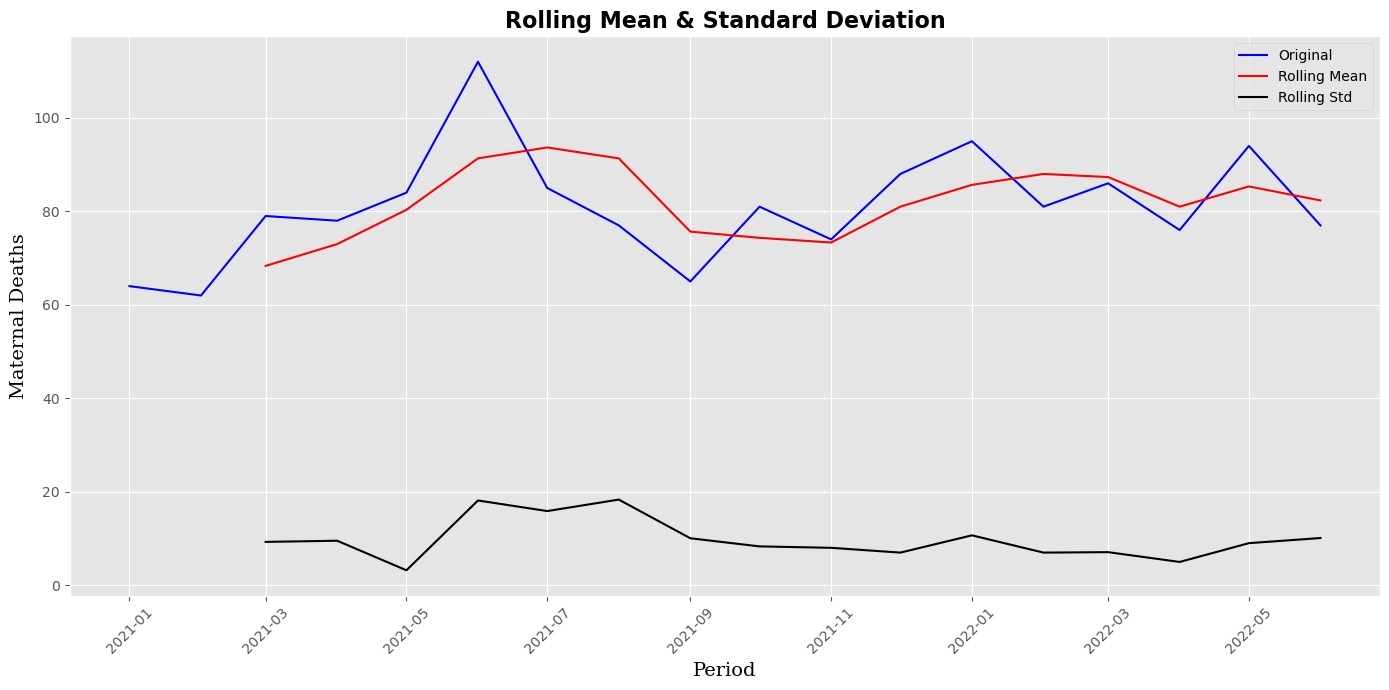

Results of Dickey-Fuller Test
Test Statistic              -4.301439
p value                      0.000442
#Lags used                   7.000000
No:of observations found    10.000000
Critical Value (1%)         -4.331573
Critical Value (5%)         -3.232950
Critical Value (10%)        -2.748700
dtype: float64


In [165]:
test_stationarity(train_data)

Through the above graph, we can see the decreasing mean and standard deviation and hence our series is stationary.

We see that the p-value is less than 0.05 so we reject the Null hypothesis. 


#### Differencing simple moving average

In [166]:
# Endog ; split data into training and testing sets
train_data_endog = data.iloc[:len(data)-6]
test_data_endog = data.iloc[len(data)-8:]

In [167]:
train_data_endog = data
train_data_endog.head()

,deaths
month,
2021-01-01,64
2021-02-01,62
2021-03-01,79
2021-04-01,78
2021-05-01,84


In [168]:
#test data
test_data_endog = data.iloc[len(data)-8:]
test_data_endog.head()

,deaths
month,
2022-05-01,94
2022-06-01,77
2022-07-01,86
2022-08-01,117
2022-09-01,83


In [169]:
#train endogenous variable
movingAverage_endog = train_data_endog.rolling(window=3).mean()
#df_minus_movingAverage_endog = train_data_endog - movingAverage_endog
movingAverage_endog.dropna(inplace=True)
movingAverage_endog.head()

,deaths
month,
2021-03-01,68.333333
2021-04-01,73.000000
2021-05-01,80.333333
2021-06-01,91.333333
2021-07-01,93.666667


In [170]:
#Exogenous variables
df = pd.read_csv('merged_data_month.csv')
df = df.drop(['deliveries','Referrals','deaths'], axis=1)
df['month']=pd.to_datetime(df['month'], infer_datetime_format=True)
df = df.sort_values(by='month')
df.set_index('month', inplace=True)
df.head(4)

,Admissions,HIVPositive_deliveries,Othercauses_Abortions,GBV_Abortions,malaria,maternal_nutrition,blood_pressure
month,,,,,,,
2021-01-01,12392,4407,5927,146,27101,101995,1150
2021-02-01,12066,4428,5751,129,24548,100977,1101
2021-03-01,13569,9125,8084,132,25474,113684,1102
2021-04-01,13444,5062,23433,167,26025,113631,853


In [171]:
# split data into training and testing sets
train_data_exog = df.iloc[:len(data)-6]
test_data_exog = df.iloc[len(data)-8:]

In [172]:
train_data_exog = df
train_data_exog.head()

,Admissions,HIVPositive_deliveries,Othercauses_Abortions,GBV_Abortions,malaria,maternal_nutrition,blood_pressure
month,,,,,,,
2021-01-01,12392,4407,5927,146,27101,101995,1150
2021-02-01,12066,4428,5751,129,24548,100977,1101
2021-03-01,13569,9125,8084,132,25474,113684,1102
2021-04-01,13444,5062,23433,167,26025,113631,853
2021-05-01,14381,5290,5858,199,30859,120194,1044


In [173]:
#test exogenous variables
test_data_exog = df.iloc[len(data)-8:]
test_data_exog.head()

,Admissions,HIVPositive_deliveries,Othercauses_Abortions,GBV_Abortions,malaria,maternal_nutrition,blood_pressure
month,,,,,,,
2022-05-01,14335,5163,5734,195,40668,127010,1238
2022-06-01,13701,4574,5505,187,40988,121626,1416
2022-07-01,13527,4952,6151,128,42504,123155,1448
2022-08-01,14481,4875,5887,104,36324,124197,1478
2022-09-01,13476,4574,6777,85,32377,121822,1297


In [174]:
#test
movingAverages_T_exog = test_data_exog.rolling(window=3).mean()
#T_df_minus_movingAverages_exog = test_data_exog - movingAverages_T_exog
#T_df_minus_movingAverages_exog.head()
# dropping nan values
movingAverages_T_exog.dropna(inplace=True)
movingAverages_T_exog.head()

,Admissions,HIVPositive_deliveries,Othercauses_Abortions,GBV_Abortions,malaria,maternal_nutrition,blood_pressure
month,,,,,,,
2022-07-01,13854.333333,4896.333333,5796.666667,170.000000,41386.666667,123930.333333,1367.333333
2022-08-01,13903.000000,4800.333333,5847.666667,139.666667,39938.666667,122992.666667,1447.333333
2022-09-01,13828.000000,4800.333333,6271.666667,105.666667,37068.333333,123058.000000,1407.666667
2022-10-01,13824.333333,4894.000000,6022.666667,103.333333,34448.333333,121936.000000,1326.000000
2022-11-01,13107.333333,4783.000000,5937.666667,117.333333,34923.333333,119240.333333,1219.666667


- Since **p value < 0.05**, data is now **stationary**

In [175]:
#checking lags
#stationary
from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(train_data_endog)

{'bic':             0           1           2
 0  198.531902  201.118659  203.414844
 1  200.925649  203.925824  206.493482
 2  203.631929  207.277243  206.002859
 3  206.599929  209.494619  208.635204
 4  209.157347  212.301105         NaN,
 'bic_min_order': (0, 0)}

## ARIMA Model

In [176]:
#stationary
train_data_endog.index

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='month', freq=None)

In [177]:
#stationary
train_data_exog.index

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='month', freq=None)

Plotting ARIMA Model


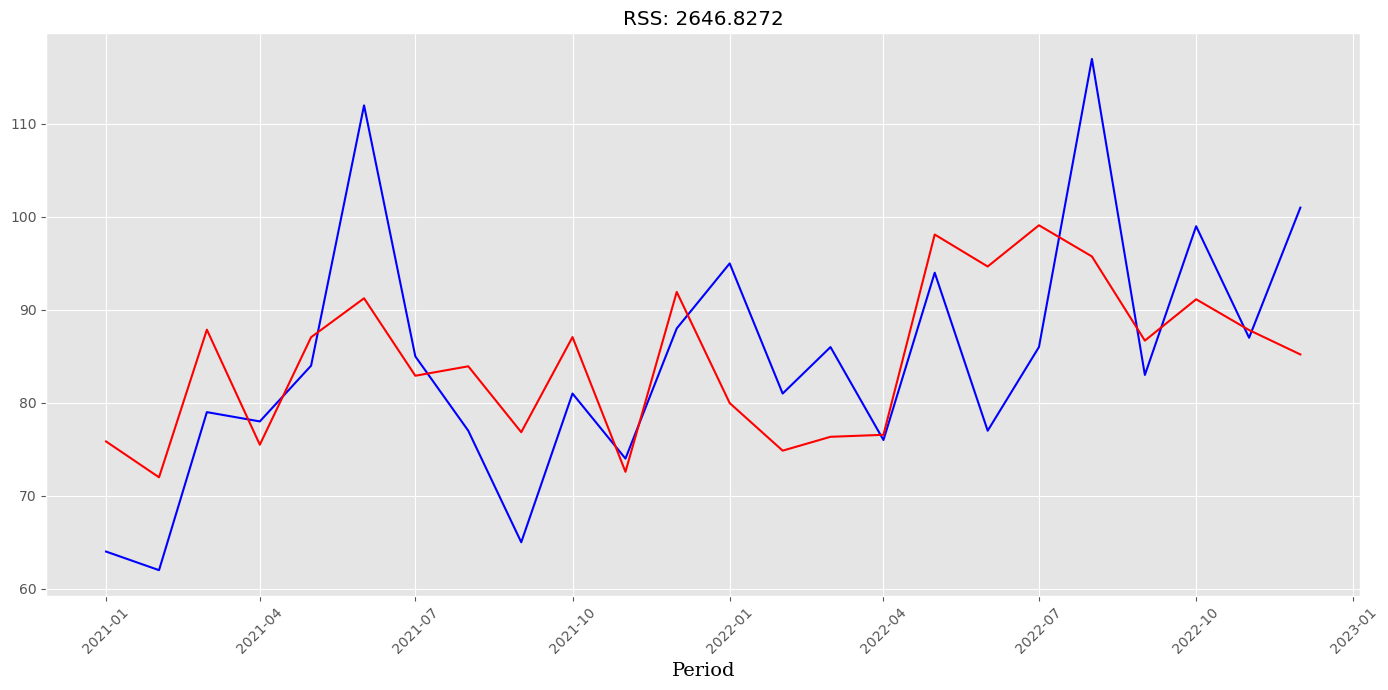

In [178]:
# stationary
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model

print('Plotting ARIMA Model')
model = ARIMA(endog=train_data_endog, exog=train_data_exog)
results_ARIMA = model.fit()
plt.style.use('ggplot')
plt.plot(train_data_endog,color='b')
plt.plot(results_ARIMA.fittedvalues, color='r')
plt.title('RSS: {:1.4f}'.format(sum((results_ARIMA.fittedvalues-data['deaths'])**2)))
plt.xticks(rotation=45)
plt.xlabel('Period', fontsize=14, fontfamily='serif')
plt.annotate('Annotate', xy=(3, 9), xytext=(4, 16), fontsize=12,
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.tight_layout()
plt.show()

In [179]:
# predict test set data
test_data['predicted_deaths'] = results_ARIMA.predict(start='2022-07-01', end='2022-12-01', 
                                                      exog=movingAverages_T_exog, dynamic=True)

In [180]:
test_data['predicted_deaths']

month
2022-07-01    99.101655
2022-08-01    95.749113
2022-09-01    86.693510
2022-10-01    91.139435
2022-11-01    87.828916
2022-12-01    85.206226
Name: predicted_deaths, dtype: float64

In [181]:
#train endogenous variable MA
movingAverage_endog = train_data_endog.rolling(window=3).mean()
#df_minus_movingAverage_endog = train_data_endog - movingAverage_endog
movingAverage_endog.dropna(inplace=True)
movingAverage_endog.head()

,deaths
month,
2021-03-01,68.333333
2021-04-01,73.000000
2021-05-01,80.333333
2021-06-01,91.333333
2021-07-01,93.666667


In [182]:
#train exog
movingAverages_exog = train_data_exog.rolling(window=3).mean()
#df_minus_movingAverages_exog = train_data_exog - movingAverages_exog
movingAverages_exog.dropna(inplace=True)
movingAverages_exog.head()

,Admissions,HIVPositive_deliveries,Othercauses_Abortions,GBV_Abortions,malaria,maternal_nutrition,blood_pressure
month,,,,,,,
2021-03-01,12675.666667,5986.666667,6587.333333,135.666667,25707.666667,105552.000000,1117.666667
2021-04-01,13026.333333,6205.000000,12422.666667,142.666667,25349.000000,109430.666667,1018.666667
2021-05-01,13798.000000,6492.333333,12458.333333,166.000000,27452.666667,115836.333333,999.666667
2021-06-01,13919.666667,5645.000000,11672.666667,186.666667,29334.333333,114277.666667,964.333333
2021-07-01,14430.666667,5623.333333,5713.666667,187.000000,29467.333333,114257.333333,1213.666667


Plotting ARIMA Model


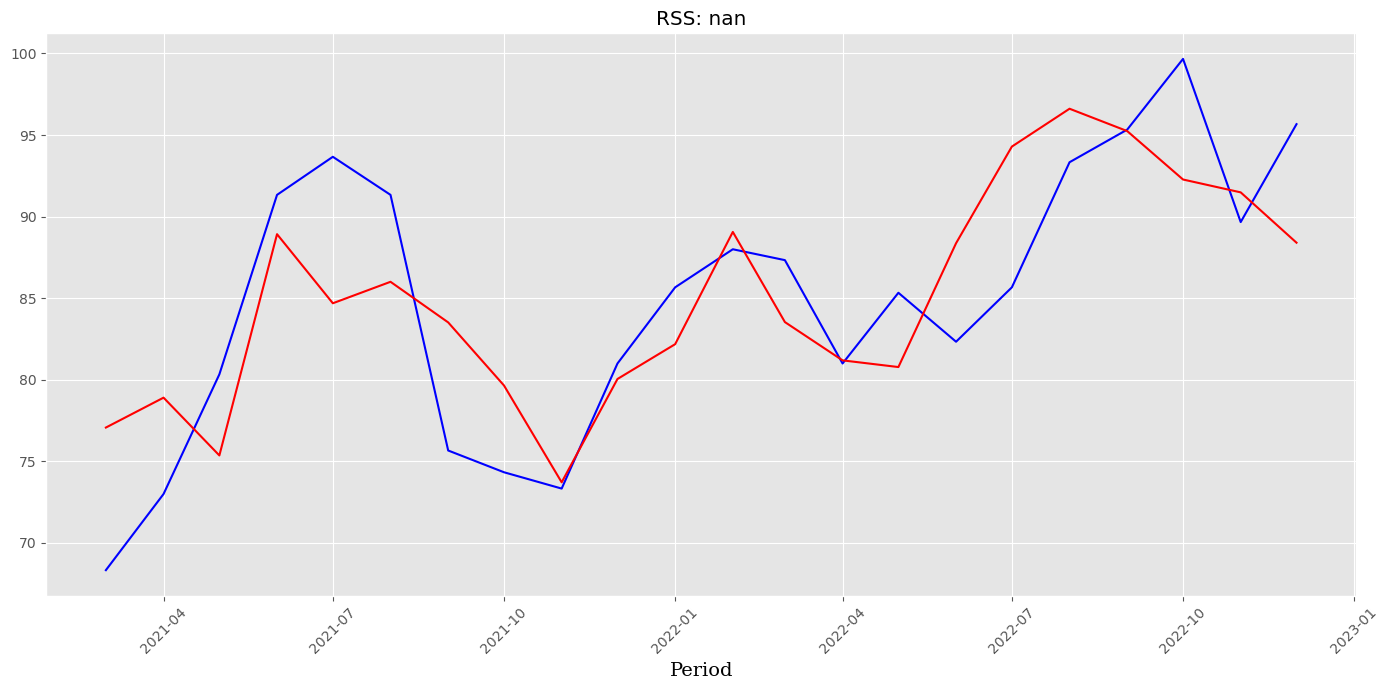

In [183]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model

print('Plotting ARIMA Model')
model = ARIMA(endog=movingAverage_endog, exog=movingAverages_exog)
results_ARIMA = model.fit()
plt.style.use('ggplot')
plt.plot(movingAverage_endog,color='b')
plt.plot(results_ARIMA.fittedvalues, color='r')
plt.title('RSS: {:1.4f}'.format(sum((results_ARIMA.fittedvalues-data['deaths'])**2)))
plt.xticks(rotation=45)
plt.xlabel('Period', fontsize=14, fontfamily='serif')
plt.annotate('Annotate', xy=(3, 9), xytext=(4, 16), fontsize=12,
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.tight_layout()
plt.show()

In [184]:
# predict test set data
test_data['predicted_deaths'] = results_ARIMA.predict(start='2022-07-01', end='2022-12-01', 
                                                      exog=movingAverages_T_exog, dynamic=True)
test_data['predicted_deaths']

month
2022-07-01    94.292650
2022-08-01    96.612534
2022-09-01    95.242190
2022-10-01    92.274921
2022-11-01    91.486780
2022-12-01    88.402172
Name: predicted_deaths, dtype: float64

In [185]:
test_data

,deaths,predicted_deaths
month,,
2022-07-01,86,94.292650
2022-08-01,117,96.612534
2022-09-01,83,95.242190
2022-10-01,99,92.274921
2022-11-01,87,91.486780
2022-12-01,101,88.402172


### Getting predictions

In [186]:
# to pandas series
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

In [187]:
#to dataframe

pred_ARIMA = pred_ARIMA_diff.to_frame()
pred_ARIMA.tail()

,0
month,
2022-08-01,96.612534
2022-09-01,95.242190
2022-10-01,92.274921
2022-11-01,91.486780
2022-12-01,88.402172


In [188]:
df1 = pd.DataFrame(data.deaths[2:])

In [189]:
# rename the first column
pred_ARIMA = pred_ARIMA.rename(columns={0: 'Forecasted deaths'})
pred_ARIMA.head()

,Forecasted deaths
month,
2021-03-01,77.072930
2021-04-01,78.905542
2021-05-01,75.364101
2021-06-01,88.924314
2021-07-01,84.690494


In [190]:
des = pd.DataFrame(pred_ARIMA.index)
# Save the DataFrame as a CSV file
des.to_csv('des.csv', index=False)

In [191]:
merged_df = pd.concat([df1['deaths'], pred_ARIMA], axis=1)
merged_df

,deaths,Forecasted deaths
month,,
2021-03-01,79,77.072930
2021-04-01,78,78.905542
2021-05-01,84,75.364101
2021-06-01,112,88.924314
2021-07-01,85,84.690494
2021-08-01,77,86.005971
2021-09-01,65,83.517377
2021-10-01,81,79.651391
2021-11-01,74,73.716884


In [192]:
# Save the DataFrame as a CSV file
merged_df.to_csv('merged_df.csv', index=False)


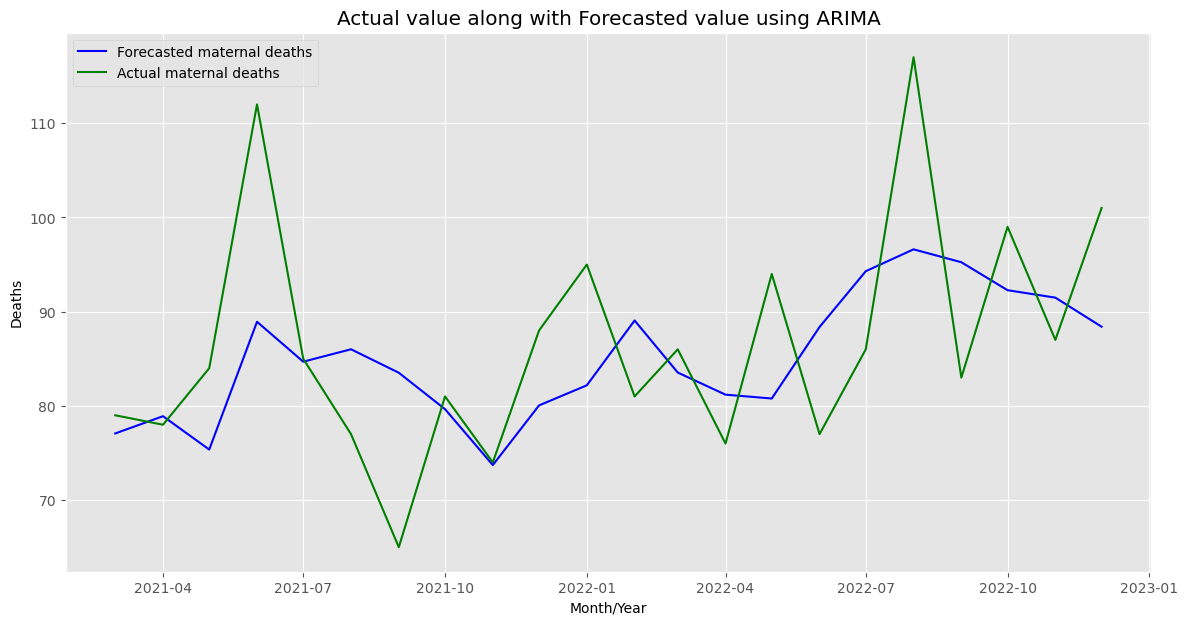

In [193]:
import matplotlib.pyplot as plt

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the data on the axis, with different colors for each line
ax.plot(merged_df.index, merged_df['Forecasted deaths'], color='blue', label='Forecasted maternal deaths')
ax.plot(merged_df.index, merged_df.deaths, color='green', label='Actual maternal deaths')

# Add a legend to the plot
ax.legend()

# Set the title and axis labels
ax.set_title('Actual value along with Forecasted value using ARIMA')
ax.set_xlabel('Month/Year')
ax.set_ylabel('Deaths')

# Display the plot
plt.show()


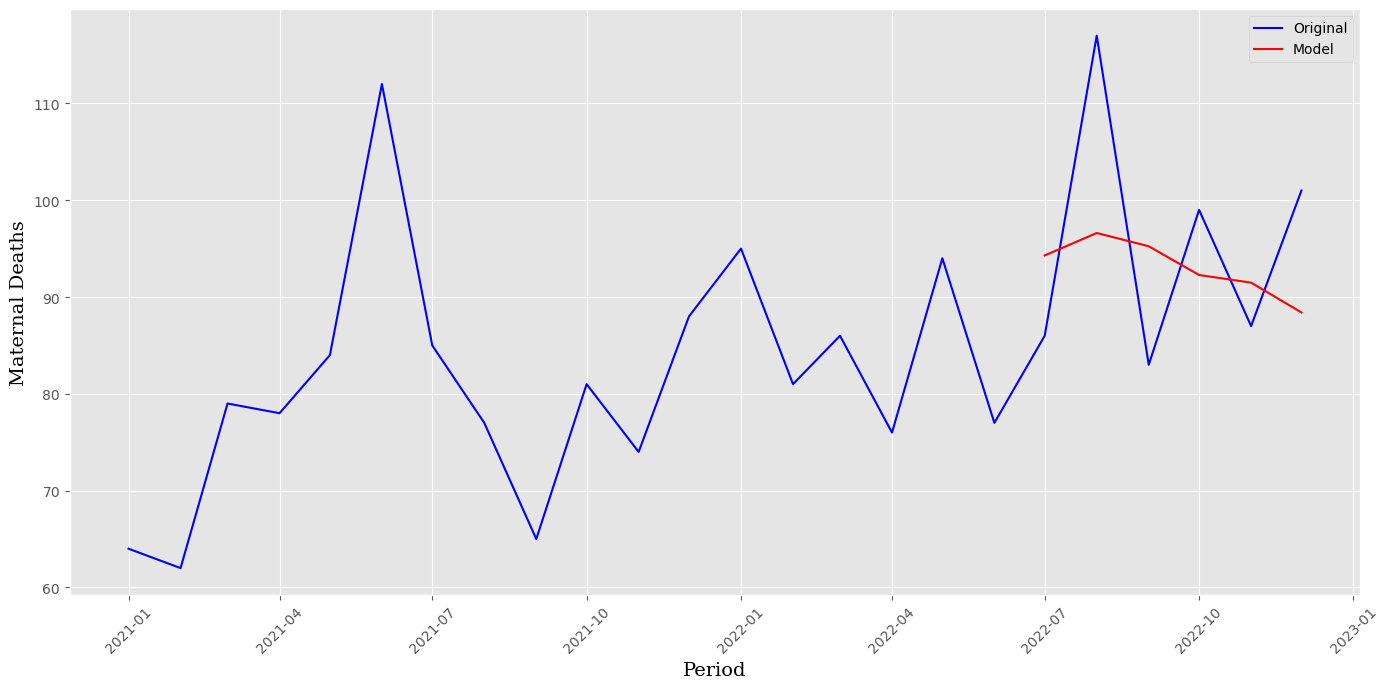

In [194]:
# plotting fitted model
plt.style.use('ggplot')
plt.plot(train_data_endog, color='b', label='Original')
plt.plot(test_data.predicted_deaths, color='r', label='Model')
plt.ylabel('Maternal Deaths', fontsize=14, fontfamily='serif')
plt.xlabel('Period', fontsize=14, fontfamily='serif')
plt.xticks(rotation=45)

plt.annotate('Annotate', xy=(3, 9), xytext=(4, 16), fontsize=12,
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.tight_layout()
plt.legend(loc='best')
plt.show(block=False)

In [195]:
test_data_endog.deaths[2:]

month
2022-07-01     86
2022-08-01    117
2022-09-01     83
2022-10-01     99
2022-11-01     87
2022-12-01    101
Name: deaths, dtype: int64

In [196]:
test_data

,deaths,predicted_deaths
month,,
2022-07-01,86,94.292650
2022-08-01,117,96.612534
2022-09-01,83,95.242190
2022-10-01,99,92.274921
2022-11-01,87,91.486780
2022-12-01,101,88.402172


In [198]:
# evaluate model performance
mse = np.mean((test_data_endog['deaths'] - test_data['predicted_deaths'])**2)
mae = np.mean(abs(test_data_endog['deaths'] - test_data['predicted_deaths']))
rmse = np.sqrt(mse)
mape = np.mean(np.abs(test_data['predicted_deaths'] - test_data_endog['deaths'])/np.abs(test_data_endog['deaths']))

print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('Root Mean Squared Error: ', rmse)
print('MAPE: '+str(mape))

Mean Squared Error:  143.05853355702442
Mean Absolute Error:  10.788665619610144
Root Mean Squared Error:  11.960707903674615
MAPE: 0.11040125419991025


In [199]:
# forecast values for next 6 months
fc=results_ARIMA.forecast(steps=6, exog = movingAverages_T_exog)
forecast = pd.array(fc)
forecast

<PandasArray>
[94.29264966413668, 96.61253350932822, 95.24218978211205, 92.27492069138133,
 91.48678039255617, 88.40217192043448]
Length: 6, dtype: float64

In [200]:
Data = results_ARIMA.summary()
Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 deaths   No. Observations:                   22
Model:                          ARIMA   Log Likelihood                 -91.487
Date:                Wed, 05 Apr 2023   AIC                            200.974
Time:                        22:06:14   BIC                            210.793
Sample:                    03-01-2021   HQIC                           203.287
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    149.9852   1781.633      0.084      0.933   -3341.951    3641.921
Admissions                 0.0081      0.084      0.097      0.923      -0.157       0.173
HIVPositive_deliveries    -0.0120      0.165     -0.072      0.942      -0.336       0.312
Othercauses_Abortions      0.0011      0.026      0.043      0.965      -0.049       0.052
GBV_Abortions             -0.0782      1.134     -0.069      0.945      -2.300       2.144
malaria                    0.0014      0.011      0.129      0.897      -0.021       0.023
maternal_nutrition        -0.0012      0.018     -0.069      0.945      -0.036       0.034
blood_pressure            -0.0087      0.243     -0.036      0.971      -0.485       0.467
sigma2                   622.4459    277.825      2.240      0.025      77.919    1166.973
===================================================================================
Ljung-Box (L1) (Q):                   1.03   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.31   Prob(JB):                         0.55
Heteroskedasticity (H):               0.74   Skew:                            -0.13
Prob(H) (two-sided):                  0.71   Kurtosis:                         1.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **Thank You**
## **Adrian Kasito**